In [2]:
#pip install apyori

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset: book

In [2]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 9 - Association Rules\\book.csv")

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 9 - Association Rules\\book.csv")
for i in df.columns:
    df[i][df[i]==1]=i
df1=pd.DataFrame([],columns=['Items'])
for i in range(df.shape[0]):
    a=['','']
    for j in range(df.shape[1]):
        if df.iloc[i,j] != 0:
            a[0]=df.iloc[i,j]
            if a[1]!='':
                a[1]=a[1]+','+a[0]
            else:
                a[1]=a[0]
        if a[1]!='':
            df1.loc[i]=a[1]
        else:
            df1.loc[i]='NaN'
a=[]
for i in df1['Items']:
    a.append(i)
df1=pd.DataFrame(pd.Series(a),columns=['Items'])
df1.head()

C:\Users\shred\AppData\Local\Temp/ipykernel_2656/3596698147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]==1]=i


,Items
0,"YouthBks,DoItYBks,GeogBks"
1,ChildBks
2,NaN
3,"ChildBks,YouthBks,CookBks,RefBks,GeogBks"
4,"CookBks,GeogBks"


In [5]:
DF = df1['Items'].str.split(',',expand = True)
DF.head()

,0,1,2,3,4,5,6,7,8,9,10
0,YouthBks,DoItYBks,GeogBks,None,None,None,None,None,None,None,None
1,ChildBks,None,None,None,None,None,None,None,None,None,None
2,NaN,None,None,None,None,None,None,None,None,None,None
3,ChildBks,YouthBks,CookBks,RefBks,GeogBks,None,None,None,None,None,None
4,CookBks,GeogBks,None,None,None,None,None,None,None,None,None


In [6]:
for i in range(11):
    for j in range(2000):
        if DF.loc[j,i]==None:
            DF.iloc[j,i]='NaN'
DF.head()

,0,1,2,3,4,5,6,7,8,9,10
0,YouthBks,DoItYBks,GeogBks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChildBks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ChildBks,YouthBks,CookBks,RefBks,GeogBks,NaN,NaN,NaN,NaN,NaN,NaN
4,CookBks,GeogBks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### apriori algorithm from apyori library

In [7]:
from apyori import apriori

###### min_length = 41, max_length = 3, min_support = 0.2, min_confidence = 0.2, min_lift = 1.1

In [8]:
observations = []
for i in range(DF.shape[0]):
    observations.append([str(DF.values[i,j]) for j in range(DF.shape[1])])
observations
frequent_itemsets = list(apriori(observations, min_length = 41, max_length = 3, min_support = 0.2, min_confidence = 0.2, min_lift = 1.1))
frequent_itemsets

[RelationRecord(items=frozenset({'CookBks', 'ChildBks'}), support=0.256, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ChildBks'}), items_add=frozenset({'CookBks'}), confidence=0.6052009456264775, lift=1.4041785281356787), OrderedStatistic(items_base=frozenset({'CookBks'}), items_add=frozenset({'ChildBks'}), confidence=0.5939675174013921, lift=1.4041785281356787)]),
 RelationRecord(items=frozenset({'NaN', 'CookBks', 'ChildBks'}), support=0.255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ChildBks'}), items_add=frozenset({'NaN', 'CookBks'}), confidence=0.6028368794326241, lift=1.4019462312386608), OrderedStatistic(items_base=frozenset({'CookBks'}), items_add=frozenset({'NaN', 'ChildBks'}), confidence=0.5916473317865429, lift=1.402007895228775), OrderedStatistic(items_base=frozenset({'NaN', 'ChildBks'}), items_add=frozenset({'CookBks'}), confidence=0.604265402843602, lift=1.402007895228775), OrderedStatistic(items_base=frozenset({'NaN', 'CookBks'}), items_ad

###### min_length = 41, max_length = 3, min_support = 0.15, min_confidence = 0.5, min_lift = 1.66

In [9]:
observations = []
for i in range(DF.shape[0]):
    observations.append([str(DF.values[i,j]) for j in range(DF.shape[1])])
observations
frequent_itemsets = list(apriori(observations, min_length = 41, max_length = 3, min_support = 0.15, min_confidence = 0.5, min_lift = 1.66))
frequent_itemsets

[RelationRecord(items=frozenset({'GeogBks', 'ChildBks'}), support=0.195, ordered_statistics=[OrderedStatistic(items_base=frozenset({'GeogBks'}), items_add=frozenset({'ChildBks'}), confidence=0.7065217391304347, lift=1.6702641587007914)]),
 RelationRecord(items=frozenset({'ChildBks', 'RefBks'}), support=0.1515, ordered_statistics=[OrderedStatistic(items_base=frozenset({'RefBks'}), items_add=frozenset({'ChildBks'}), confidence=0.7062937062937062, lift=1.669725073980393)]),
 RelationRecord(items=frozenset({'NaN', 'GeogBks', 'ChildBks'}), support=0.194, ordered_statistics=[OrderedStatistic(items_base=frozenset({'GeogBks'}), items_add=frozenset({'NaN', 'ChildBks'}), confidence=0.7028985507246377, lift=1.665636376124734), OrderedStatistic(items_base=frozenset({'NaN', 'GeogBks'}), items_add=frozenset({'ChildBks'}), confidence=0.7054545454545454, lift=1.6677412422093274)]),
 RelationRecord(items=frozenset({'NaN', 'ChildBks', 'RefBks'}), support=0.1505, ordered_statistics=[OrderedStatistic(item

###### min_length = 0, max_length = 2, min_support = 0.1, min_confidence = 0.1, min_lift = 2.3

In [10]:
observations = []
for i in range(DF.shape[0]):
    observations.append([str(DF.values[i,j]) for j in range(DF.shape[1])])
observations
frequent_itemsets = list(apriori(observations, min_length = 0, max_length = 2, min_support = 0.1, min_confidence = 0.1, min_lift = 2.3))
frequent_itemsets

[RelationRecord(items=frozenset({'ItalCook', 'CookBks'}), support=0.1135, ordered_statistics=[OrderedStatistic(items_base=frozenset({'CookBks'}), items_add=frozenset({'ItalCook'}), confidence=0.26334106728538287, lift=2.3201856148491884), OrderedStatistic(items_base=frozenset({'ItalCook'}), items_add=frozenset({'CookBks'}), confidence=1.0, lift=2.320185614849188)])]

#### Visualization - apriori algorithm from mlxtend.frequent_patterns library - min_support=0.1

In [11]:
from mlxtend.frequent_patterns import apriori,association_rules

In [12]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 9 - Association Rules\\book.csv")
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

#### Support vs Confidence

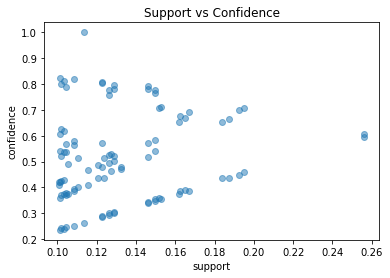

In [13]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### Support vs Lift

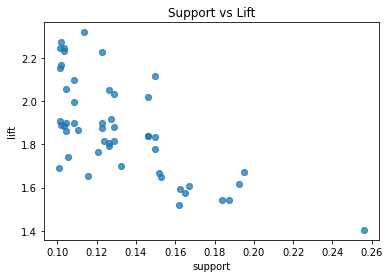

In [14]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#### Lift vs Confidence

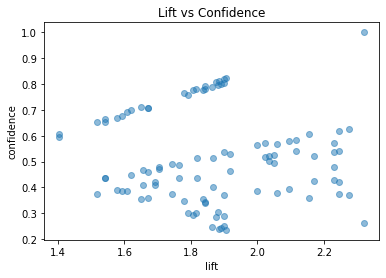

In [15]:
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()

# Dataset: my_movies

In [16]:
df=pd.read_csv("C:\\Users\\shred\\Desktop\\Data Science\\Assignments\\Assignment 9 - Association Rules\\my_movies.csv")

In [17]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [18]:
for i in df.columns:
    if i not in ['V1','V2','V3','V4','V5']:
        df.pop(i)
df.head()

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN


#### apriori algorithm from apyori library

In [19]:
from apyori import apriori

###### min_length = 41, max_length = 3, min_support = 0.2, min_confidence = 0.2, min_lift = 1.5

In [20]:
observations = []
for i in range(df.shape[0]):
    observations.append([str(df.values[i,j]) for j in range(df.shape[1])])
observations
frequent_itemsets = list(apriori(observations, min_length = 41, max_length = 3, min_support = 0.2, min_confidence = 0.2, min_lift = 1.5))
frequent_itemsets

[RelationRecord(items=frozenset({'Green Mile', 'Sixth Sense'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'Sixth Sense'}), confidence=1.0, lift=1.6666666666666667), OrderedStatistic(items_base=frozenset({'Sixth Sense'}), items_add=frozenset({'Green Mile'}), confidence=0.33333333333333337, lift=1.6666666666666667)]),
 RelationRecord(items=frozenset({'LOTR2', 'LOTR1'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'LOTR2'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR2'}), items_add=frozenset({'LOTR1'}), confidence=1.0, lift=5.0)])]

###### min_length = 41, max_length = 3, min_support = 0.15, min_confidence = 0.5, min_lift = 1.66

In [21]:
observations = []
for i in range(df.shape[0]):
    observations.append([str(df.values[i,j]) for j in range(df.shape[1])])
observations
frequent_itemsets = list(apriori(observations, min_length = 41, max_length = 3, min_support = 0.15, min_confidence = 0.5, min_lift = 1.66))
frequent_itemsets

[RelationRecord(items=frozenset({'Green Mile', 'Sixth Sense'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'Sixth Sense'}), confidence=1.0, lift=1.6666666666666667)]),
 RelationRecord(items=frozenset({'LOTR2', 'LOTR1'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'LOTR2'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR2'}), items_add=frozenset({'LOTR1'}), confidence=1.0, lift=5.0)])]

###### min_length = 0, max_length = 2, min_support = 0.1, min_confidence = 0.1, min_lift = 2.3

In [22]:
observations = []
for i in range(df.shape[0]):
    observations.append([str(df.values[i,j]) for j in range(df.shape[1])])
observations
frequent_itemsets = list(apriori(observations, min_length = 0, max_length = 2, min_support = 0.1, min_confidence = 0.1, min_lift = 2.3))
frequent_itemsets

[RelationRecord(items=frozenset({'Green Mile', 'Harry Potter1'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'Harry Potter1'}), confidence=0.5, lift=2.5), OrderedStatistic(items_base=frozenset({'Harry Potter1'}), items_add=frozenset({'Green Mile'}), confidence=0.5, lift=2.5)]),
 RelationRecord(items=frozenset({'Green Mile', 'LOTR'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR'}), confidence=0.5, lift=5.0), OrderedStatistic(items_base=frozenset({'LOTR'}), items_add=frozenset({'Green Mile'}), confidence=1.0, lift=5.0)]),
 RelationRecord(items=frozenset({'Green Mile', 'LOTR1'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Green Mile'}), items_add=frozenset({'LOTR1'}), confidence=0.5, lift=2.5), OrderedStatistic(items_base=frozenset({'LOTR1'}), items_add=frozenset({'Green Mile'}), confidence=0.5, lift=2.5)]),
 RelationRecord(

#### Visualization - apriori algorithm from mlxtend.frequent_patterns library - min_support=0.1

In [23]:
from mlxtend.frequent_patterns import apriori,association_rules

In [24]:
df=pd.get_dummies(df)
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)

#### Support vs Confidence

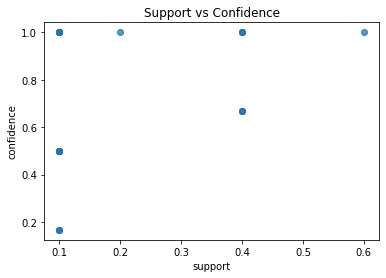

In [25]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### Support vs Lift

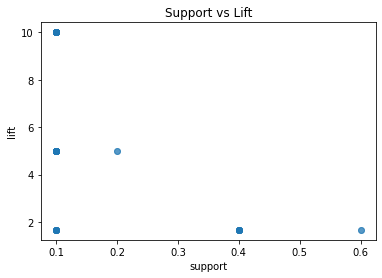

In [26]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

#### Lift vs Confidence

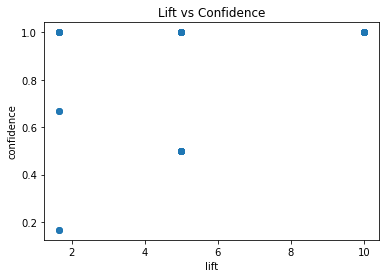

In [27]:
plt.scatter(rules['lift'], rules['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()

###### It is clear that min_length argument of the apriori algorithm in apyori library does not affect the rules.